# Program für Roboter- und Computervision

## Importieren der Bibliotheken

In [11]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
# for Rotation only cutting the picture
import argparse
import imutils

## Parameters

In [12]:
imagePath = "./Brieferstellung/test1.png"

blurring = 25

dilateErode = 15
dilateKernel = np.ones((dilateErode,dilateErode), "uint8")
erodeKernel = np.ones((dilateErode-1,dilateErode), "uint8")


## Vorbereitung des Bildes

Text(0.5, 1.0, 'Original')

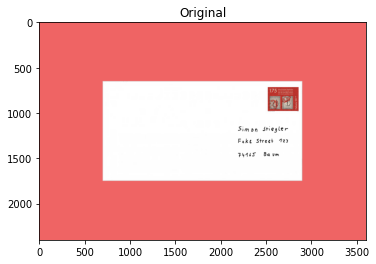

In [13]:
    # Lesen des Bilds
image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
height,width,channels = image.shape
height-=1
width-=1
showImage = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # Zeigen des Bilds
plt.imshow(showImage)
plt.title("Original")

## For Rotating the Picture
https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

In [14]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the image file")
# args, unknown =  ap.parse_args(argv[1:])

NameError: name 'argv' is not defined

Text(0.5, 1.0, 'blurred')

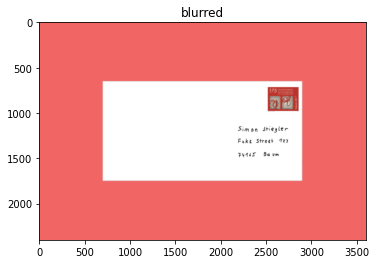

In [118]:
    # Gausian Blur
blurred  = cv2.GaussianBlur(image, (blurring,blurring) , 2, 2,cv2.THRESH_BINARY)
blurredShow = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurredShow)
plt.title("blurred")

## Binarisierung
https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

Text(0.5, 1.0, 'Gray')

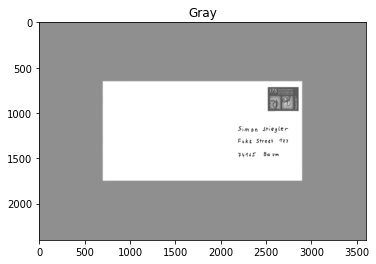

In [119]:
# thresh1 = cv2.adaptiveThreshold(blurred,255,125,cv2.THRESH_BINARY,11,5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)
plt.title("Gray")

Text(0.5, 1.0, 'Canny')

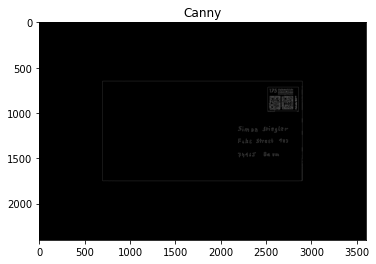

In [120]:
canny = cv2.Canny(gray,0,30)
height,width = canny.shape
plt.imshow(canny, cmap="gray")
plt.title("Canny")

Text(0.5, 1.0, 'dilate')

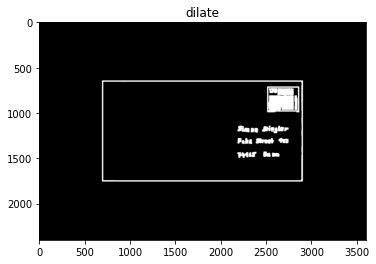

In [121]:
dilate = cv2.dilate(canny,dilateKernel,iterations=1)
plt.imshow(dilate, cmap="gray")
plt.title("dilate")

Text(0.5, 1.0, 'erode')

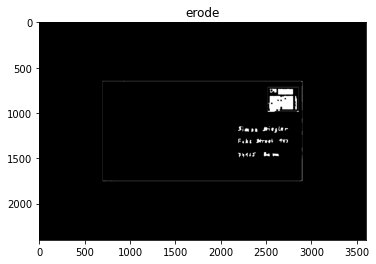

In [122]:
erode = cv2.erode(dilate,erodeKernel,iterations=1)
plt.imshow(erode, cmap="gray")
plt.title("erode")

In [123]:
img,contours,hierachy = cv2.findContours(erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# Hierarchie [Previous, Next, Child, Parent]

In [143]:
def sizeSort(element):
    return len(element)
contours.sort(reverse=True,key=sizeSort)
for index,contour in enumerate(contours):
    if(index<6):
        print(contour.size)

13178
13176
4368
2458
1250
674


## Get the Moments
https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

{'m00': 2417847.5, 'm10': 4349807434.166666, 'm01': 2901363585.0, 'm20': 8798949512048.582, 'm11': 5219635399034.458, 'm02': 3725375932076.083, 'm30': 1.9332284107241852e+16, 'm21': 1.0558368352352518e+16, 'm12': 6702029297290509.0, 'm03': 5055489309615189.0, 'mu20': 973466426646.5469, 'mu11': -37426176.16894531, 'mu02': 243803726896.04053, 'mu30': -1737685796.0, 'mu21': -42013558736.5, 'mu12': 14074857830.25, 'mu03': 2319650811.0, 'nu20': 0.16651875968388868, 'nu11': -6.402029145301282e-06, 'nu02': 0.041704462627326716, 'nu30': -1.9116086539894078e-07, 'nu21': -4.621864473454308e-06, 'nu12': 1.5483593232971606e-06, 'nu03': 2.551821839568716e-07}
1799 1199


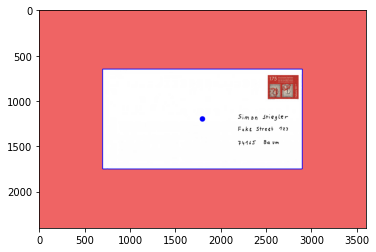

In [146]:
firstContour = contours[0]
moments = cv2.moments(firstContour)

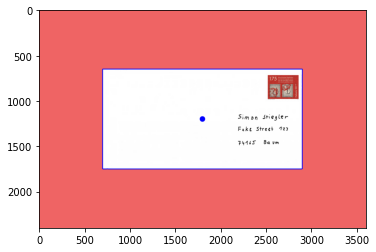

In [152]:
# https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

# # center of the Conture
# cx = int(M['m10']/M['m00'])
# cy = int(M['m01']/M['m00'])

#( center (x,y), (width, height), angle of rotation ).
minArea = cv2.minAreaRect(firstContour)
cx = int(minArea[0][0])
cy = int(minArea[0][1])
widthLetter = int(minArea[1][0])
heightLetter = int(minArea[1][1])
angle = int(minArea[2])

# Highlight the Contour of Find Letter and show center of Letter
highlightedContour = cv2.circle(showImage,(cx,cy),radius=30, color=(0,0,255),thickness=-1)
cv2.drawContours(highlightedContour, firstContour, -1, (0, 0, 255), 7) 
plt.imshow(highlightedContour)


In [2]:
# cutting the edges
angle = 30
# M = cv2.getRotationMatrix2D((int(width/2),int(height/2)), angle, 1)
# rotatedLetter = cv2.warpAffine(showImage,M,(width,height))
# plt.imshow(rotatedLetter)
rotated = imutils.rotate_bound(showImage, angle)
cv2.imshow("Rotated (Correct)", rotated)


NameError: name 'imutils' is not defined

### Bekomme den Stream der Kamera und verwandle es in ein grau Stufen Bild
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html?highlight=video

In [76]:
# cap = cv2.VideoCapture(0)

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html?highlight=imshow
#     #canny Edge Detection
#     edges = cv2.Canny(gray,100,200)
#     # 1 Fenster mit Graustufe
#     namedWindow1 = "gray"
#     cv2.namedWindow(namedWindow1)
#     cv2.moveWindow(namedWindow1,0,0)
#     cv2.imshow(namedWindow1, gray)
#     # 2 Fenster mit Kantenbild
#     namedWindow2 = "edges"
#     cv2.namedWindow(namedWindow2)
#     cv2.moveWindow(namedWindow2,640,0)
#     cv2.imshow(namedWindow2,edges)
#     # 3 Fenster 
#     namedWindow3 = "weiteres"
#     cv2.namedWindow(namedWindow3)
#     cv2.moveWindow(namedWindow3,1280,0)
#     cv2.imshow(namedWindow3,edges)


#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [75]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()